In [27]:
# coding: utf-8
import itertools
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams.update({'font.size': 21})
import numpy as np
from sympy import *

# 金融工程学实验报告
###### 林新凯 金融工程 2016312010173
# 1. 等额本息 V.S. 等额本金
等额本息、等额本金都是一种贷款的还款方式。
## 1.1 等额本息
等额本息法是指在还款期内，每月偿还同等数额的贷款（包括本金和利息），该方式经常被银行使用。
等额本息法的计算公式为：
$$每期还款额 = \frac{贷款本金 * 每期利率 * (1 + 每期利率)^{还款期数}}{(1 + 每期利率)^{还款期数} - 1}$$

In [28]:
def ELP(P, R, N):
    '''
    参数：
        P: 贷款本金。(float)
        R: 每期利率。(float)
        N: 还款期数。(float)
    返回：
        等额本息法(equal loan payment)计算的每期还款额。(list)
    '''
    return list(itertools.repeat(P * (R * (1+R)**N)/((1+R)**N - 1), N))
def ELP_total(P, R, N):
    '''
    参数：
        P: 贷款本金。(float)
        R: 每期利率。(float)
        N: 还款期数。(float)
    返回：
        等额本息法计算的总还款额。(float)
    '''
    return sum(ELP(P, R, N)) # 加总每期还款额

例如一笔20万的贷款，分十年还清，每个月还本付息，贷款年利率为4.2%。
则：
- 贷款本金（P）：20万元
- 每期利率（R）：$\frac{4.2\%}{12} = 0.35\%$
- 还款期数（N）：$10*12 = 120$期

In [29]:
P = 20e4
R = 0.042/12
N = 10*12
pd.DataFrame(
    [round(x, 2) for x in ELP(P, R, N)],  # 保留两位小数
    index = ["第" + str(i+1) + "个月" for i in range(N)],  # 第几期
    columns = ["每期还款额（元）"] # 定义列名
)

,每期还款额（元）
第1个月,2043.97
第2个月,2043.97
第3个月,2043.97
第4个月,2043.97
第5个月,2043.97
第6个月,2043.97
第7个月,2043.97
第8个月,2043.97
第9个月,2043.97
第10个月,2043.97


## 1.2 等额本金
等额本金还款又称利随本清、等本不等息还款法。贷款人将本金分摊到每个月内，同时付清上一交易日至本次还款日之间的利息。
等额本金法的计算公式为：
$$每期还款额 = \frac{贷款本金}{还款期数} + (贷款本金 - 累计已还本金) * 每期利率$$

In [30]:
def EPP(P, R, N):
    '''
    参数：
        P: 贷款本金。(float)
        R: 每期利率。(float)
        N: 还款期数。(float)
    返回：
        等额本金法(equal principle payment)计算的每期还款额。(list)
    '''
    return [P / N + (P - P / N * i) * R for i in range(N)]
def EPP_total(P, R, N):
    '''
    参数：
        P: 贷款本金。(float)
        R: 每期利率。(float)
        N: 还款期数。(float)
    返回：
        等额本金法计算的总还款额。(float)
    '''
    return sum(EPP(P, R, N)) # 加总每期还款额

采用与等额本息相同的例子：一笔20万的贷款，分十年还清，每个月还本付息，贷款年利率为4.2%。
则：
- 贷款本金（P）：20万元
- 每期利率（R）：$\frac{4.2\%}{12} = 0.35\%$
- 还款期数（N）：$10*12 = 120$期

In [31]:
pd.DataFrame(
    [round(x, 2) for x in EPP(P, R, N)],  # 保留两位小数
    index = ["第" + str(i+1) + "个月" for i in range(N)], 
    columns = ["每期还款额（元）"]
)

,每期还款额（元）
第1个月,2366.67
第2个月,2360.83
第3个月,2355.00
第4个月,2349.17
第5个月,2343.33
第6个月,2337.50
第7个月,2331.67
第8个月,2325.83
第9个月,2320.00
第10个月,2314.17


## 1.3 等额本息与等额本金的比较
将两种方法的每期还款额在同一张图上用折线图表示：

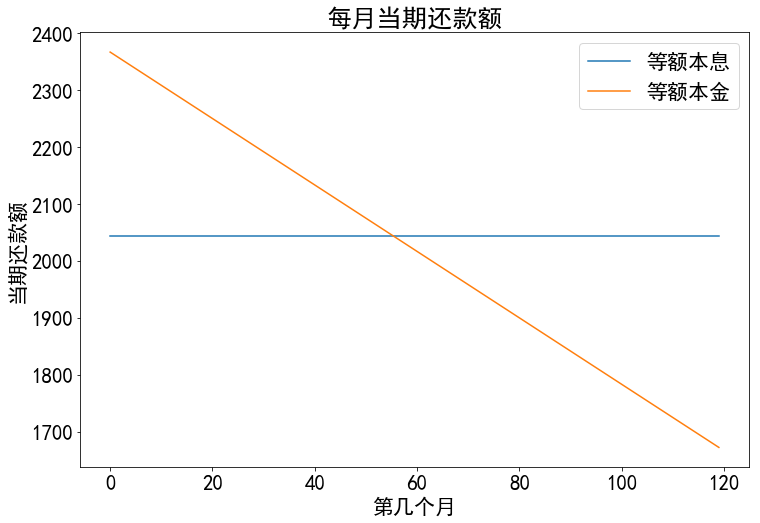

In [32]:
x = range(N)
plt.figure(figsize = (12, 8)) # 定义图片尺寸
plt.plot(x, ELP(P, R, N), label = "等额本息")
plt.plot(x, EPP(P, R, N), label = "等额本金")
plt.xlabel("第几个月") # x轴标签
plt.ylabel("当期还款额") # y轴标签
plt.title("每月当期还款额") # 图表标题
plt.legend() # 显示图例

我们可以看到：
- 等额本息法每个月的还款额都是不变的；
- 等额本金法每个月的还款额递减；

准确地说，等额本金法在期初还款额比等额本息法高，其后每一期都比上一期还款额低一些，在后半期比每期还款额都比等额本息法低。

两种还款方法的这个区别使得：
- 等额本息法适合当前储蓄/收入不足，但预期未来有稳定收入的人群，例如年轻人；
- 等额本金法适合当前储蓄/收入足够，但预期未来收入会下降的人群，例如中老年人；


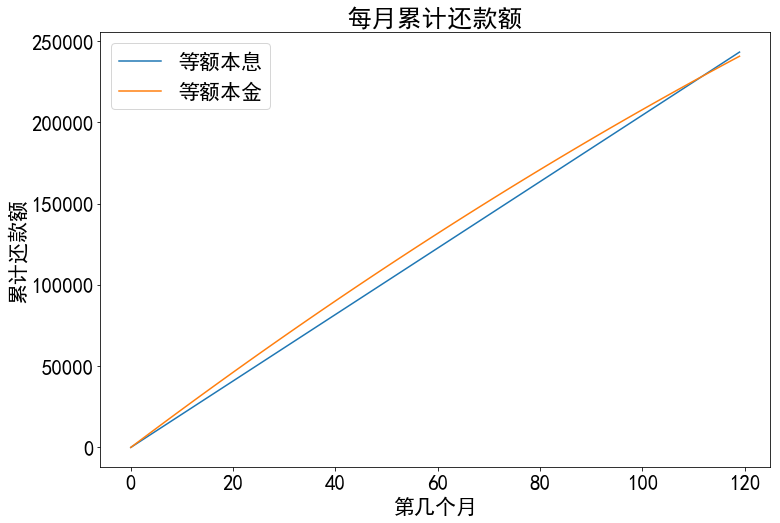

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(x, [sum(ELP(P, R, N)[:i]) for i in range(len(x))], label = "等额本息")
plt.plot(x, [sum(EPP(P, R, N)[:i]) for i in range(len(x))], label = "等额本金")
plt.xlabel("第几个月")
plt.ylabel("累计还款额")
plt.title("每月累计还款额")
plt.legend()

将两种方法的累计还款额在同一张图上用折线图表示出来，我们也可以看到，在前期等额本金法还款较多，但最终总还款额较少。

In [34]:
ELP_total(P, R, N) - EPP_total(P, R, N)

2926.100587561552

实际上，在这个例子中，等额本金法的总还款额比等额本息法要少2926元。
在某些极端情形下，等额本金法的总还款额可能远低于等额本息法，例如一笔1000元的贷款，分十年还清，每个月还本付息，贷款年利率为300%。
则：
- 贷款本金（P）：1000元
- 每期利率（R）：$\frac{300\%}{12} = 250\%$
- 还款期数（N）：$10*12 = 120$期

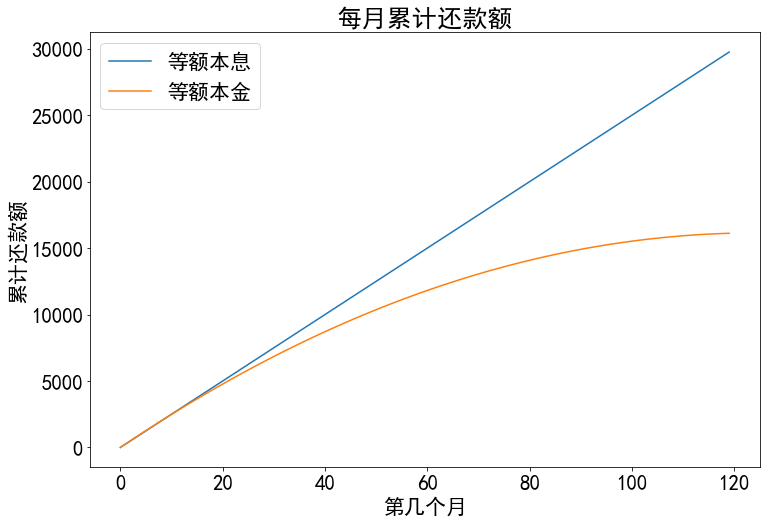

In [35]:
P = 1e3
R = 3/12
N = 10*12
plt.figure(figsize = (12, 8))
plt.plot(x, [sum(ELP(P, R, N)[:i]) for i in range(len(x))], label = "等额本息")
plt.plot(x, [sum(EPP(P, R, N)[:i]) for i in range(len(x))], label = "等额本金")
plt.xlabel("第几个月")
plt.ylabel("累计还款额")
plt.title("每月累计还款额")
plt.legend()

In [36]:
str(round(((ELP_total(P, R, N) - EPP_total(P, R, N)) / EPP_total(P, R, N))*100, 2)) + "%"

'86.05%'

在这个例子中，等额本金法的总还款额只是等额本息法的总还款额的86.05%。

**小结：**也就是说，虽然等额本金法一开始要付出的钱比较多，但是最后还款的总额，一定少于等额本息法。

## 1.4 考虑货币的时间价值，再次比较等额本息法与等额本金法

*那么，是否只要拥有足够的资本，等额本金法就一定好于等额本息法呢？*

尽管等额本金法的总还款额**总是**低于等额本息法的总还款额，但是假如考虑货币的时间价值，即考虑利率，结果可能会有所不同。

让我们假设还款人在第一期实际上就拥有了贷款本金的资产，在每一期它都把没有拿去还款的资产储蓄下来并依照利率增值，且利率高于贷款利率，在这种情形下，贷款人每月的剩余资产如图所示：

In [37]:
def capital(pay_list, C, r):
    capital = [C]
    for i in range(N):
        capital.append(
            (capital[i] - pay_list[i]) * (1 + r)
        )
    return capital

10687.499876238968
9970.253559476707


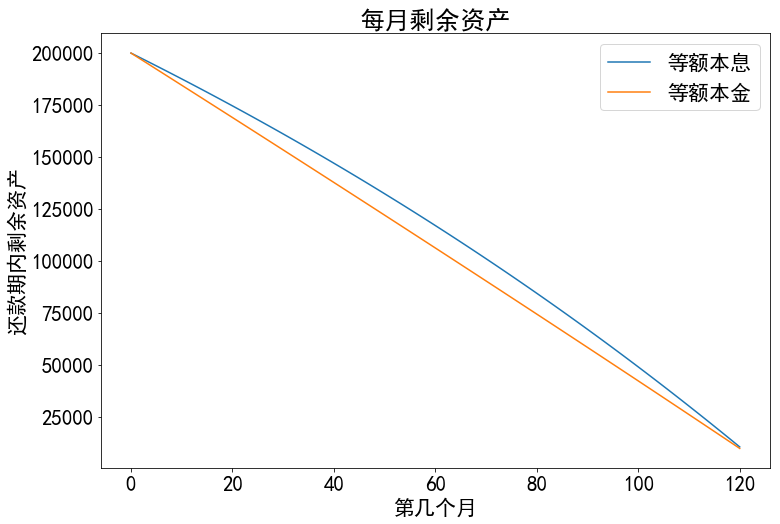

In [38]:
P = 20e4
R = 0.042/12
N = 10*12
x = range(N+1) # 由于包含第零期（原有资产），所以横轴多一个样本
plt.figure(figsize = (12, 8))
plt.plot(x, capital(ELP(P, R, N), C = P, r = 0.05/12), label = "等额本息")
plt.plot(x, capital(EPP(P, R, N), C = P, r = 0.05/12), label = "等额本金")
plt.xlabel("第几个月")
plt.ylabel("还款期内剩余资产")
plt.title("每月剩余资产")
plt.legend()
print(capital(ELP(P, R, N), C = P, r = 0.05/12)[-1])
print(capital(EPP(P, R, N), C = P, r = 0.05/12)[-1])

在考虑了货币的时间价值后，实际上**等额本息法较等额本金法更优。**

我们可以在剩余资产图中看到，等额本息法在还款期内的剩余资产（即手头上的可支配现金）都比等额本金法要高。这是因为等额本金法在期初过快地把资产都拿去还款了，所以错过了货币原本增值的机会成本。

实际上在这个例子中，等额本息法最终剩余资产10687元，而等额本金法最终剩余资产只有9970元。

倘若将利率调整为更极端的情形，即利率远高于贷款利率（假如市场上的投资回报率特别高），这时候等额本息法的优势就更明显了。

176530.02441835112
174013.43286889815


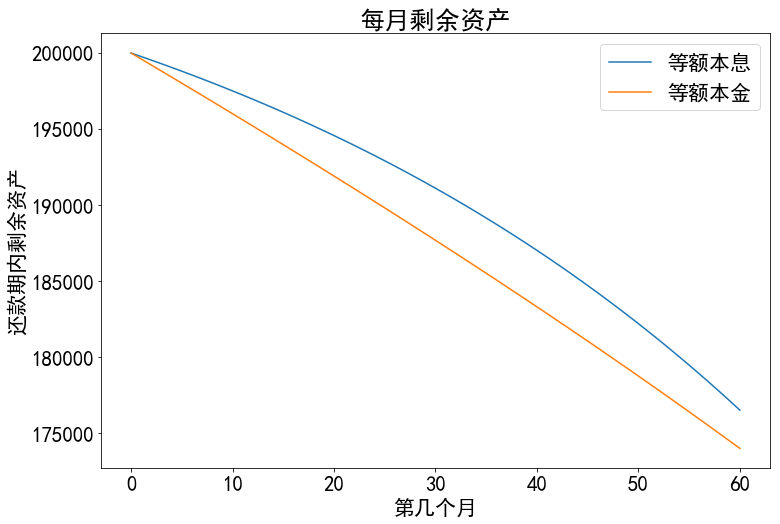

In [39]:
P = 20e4
R = 0.02/12
N = 5*12
x = range(N+1)
plt.figure(figsize = (12, 8))
plt.plot(x, capital(ELP(P, R, N), C = P, r = 0.2/12), label = "等额本息")
plt.plot(x, capital(EPP(P, R, N), C = P, r = 0.2/12), label = "等额本金")
plt.xlabel("第几个月")
plt.ylabel("还款期内剩余资产")
plt.title("每月剩余资产")
plt.legend()
print(capital(ELP(P, R, N), C = P, r = 0.2/12)[-1])
print(capital(EPP(P, R, N), C = P, r = 0.2/12)[-1])

在极端情形下（手中持有的现金拥有非常高的投资回报率，同时贷款利率特别低），等额本息法可以使你手中的资产远高于等额本金法。

**小结：**假如你在期初就拥有还清贷款的资产，在还款期内将闲置的资金投资到市场，且市场回报率（利率）足够高，那么等额本息法较等额本金法更好。实际上，只要市场利率高于贷款利率，你就应该选择等额本息法而不是等额本金法。

## 1.5 总结
1. 等额本息法还款每期还款额都相同
2. 等额本金法还款每期还款额递减
3. 等额本息法最终还款额比较高，等额本金法最终还款额比较低
4. 等额本息法适合当前资金不够，但预期未来收入稳定或上升的人群
5. 等额本金法适合当前资金充足，但预期未来收入没有或下降的人群
6. 但假如市场利率高于贷款利率，等额本息法更好，因为可以利用手中的闲置资金增值

# 2. 债券凸性

债券的凸性指债券的价格和利率的变动之间的函数关系呈现凸性。即一单位的利率变动导致的债券价格变动要小于（或等于）一单位。凸性越强就代表债券的价格对利率越敏感。

实际上，债券的凸性就是债券的内在价值公式的二阶导数。债券的内在价值可以通过下述公式计算得到：

$$P = \frac{c}{m} * F * \frac{1 - (1 + \frac{r}{m})^{-n*m}}{\frac{r}{m}} + \frac{F}{(1+\frac{r}{m})^{n*m}}$$

其中：
- $P$: 债券市场价值
- $c$: 市场年利率
- $F$: 债券面值
- $r$: 债券年收益率
- $m$: 每年债券付息次数
- $n$: 债券到期年数

## 2.1 凸性公式

通过求导，我们可以得到债券的凸性公式：

$$Convexity = \frac{1}{P*(1+\gamma)^2}*\Sigma_{t = 1}^n\frac{CF_n*t*(1+t)}{(1+\gamma)^n}$$
其中：
- $P$: 债券市场价值
- $\gamma$: 债券收益
- $CF_n$: 第$n$期现金流
- $t$: 第0期到现金流的时间

## 2.2 有效债券凸性

进一步地，我们可以计算出*有效债券凸性*：

$$Effective\ Convexity = \frac{P_i+P_d-2P_0}{2P_0\Delta\gamma^2}$$

其中：
- $P_i$: 利率上升后的债券价值
- $P_d$: 利率下降后的债券价值
- $P_0$: 当债券收益率等于市场利率时的债券价值
- $\Delta\gamma$: 利率的变动

In [40]:
def effective_convexity(
    price_increase, 
    price_decrease, 
    price, 
    delta_gamma
):
    '''
    参数：
        price_increase: 利率上升后的债券价值。(float)
        price_decrease: 利率下降后的债券价值。(float)
        price: 当债券收益率等于市场利率时的债券价值。(float)
        delta_gamma: 利率的变动。(float)
    返回：
        有效凸性。(float)
    '''
    return (price_increase + price_decrease - 2 * price)/(2*price*delta_gamma**2)


## 2.3 实例
假设一个面值为1000元的债券：
- 在市场利率上升2%的时候，价值下降到858元；
- 在市场利率下降2%的时候，价值上升到1172元；
- 7.8年到期

那么，这张债券的有效债券凸性即为37.5。

In [41]:
print(
    "有效债券凸性为：", 
    effective_convexity(
        1172, 
        858, 
        1000, 
        2/100
    )
)

有效债券凸性为： 37.5


那么，根据公式：
$$\Delta\ Bond\ Price = -D * \Delta\gamma + \frac{1}{2} * \Delta\gamma^2*{Effective\ Convexity}$$
我们可以得到当市场利率上升1个单位（1%）的时候，债券的价格应当下降7.61%。

In [42]:
def delta_bond_price(
    duration, 
    delta_gamma, 
    effective_convexity
):
    '''
    参数：
        duration: 债券到期年数。(float)
        delta_gamma: 利率变动。(float)
        effective_convexity: 有效凸性。(float)
    返回：
        债券价值变动。(float)
    '''
    return -duration*delta_gamma+1/2*delta_gamma**2*effective_convexity
print(
    "当市场利率上升1%的时候，债券下降的幅度为：", 
    str(round(
        delta_bond_price(
            duration = 7.8, 
            delta_gamma = 1/100, 
            effective_convexity = effective_convexity(
                1172, 
                858, 
                1000, 
                2/100
            )
        )*100, 
        2
    )) + "%"
)

当市场利率上升1%的时候，债券下降的幅度为： -7.61%


# 3. 利率期限结构
利率期限结构是指在某一时点上，不同期限资金的收益率与到期期限之间的关系。
## 3.1 利率期限结构计算公式
即根据已知的即期利率，去计算更远期限的即期利率。

$par=\frac{coupon}{1+r_1/2}+\frac{coupon}{(1+r_2/2)^2}+\frac{coupon+par}{(1+r_3/2)^3}$

其中：
- par：面值
- coupon：第1.5年的现金流，代入$r_1$和$r_2$求解出$r_{3}$即为1.5年的即期利率
- $r_1 = YTM_{0.5}$
- $r_2 = YTM_1$
- $par=\frac{coupon}{1+r_1/2}+\frac{coupon}{(1+r_2/2)^2}+\frac{coupon}{(1+r_3/2)^3}+\frac{coupon+par}{(1+r_4/2)^4}$

重复上述过程，最后便能求得利率期限结构]

In [43]:
def IRR(data):
    data['即期收益率'] = np.nan
    # 一年期内的到期利率即为即期利率
    data.iloc[0, 3] = data.iloc[0, 2]
    data.iloc[1, 3] = data.iloc[1, 2]
    for i in range(2, len(data)):
        # 将即期收益率设为x
        x = symbols('x')
        # 计算息票值
        coupon = data.iloc[i, 0] * data.iloc[i, 1] / 100
        p = 0 # 前n-1期的现金流贴现总和
        for j in range(i):
            p += coupon / ((1 + data.iloc[j, 3] / 200) ** (j + 1))
        # 使用Sympy的solve函数计算即期利率
        a = solve(data.iloc[i, 0] - p - ((data.iloc[i, 0] + coupon) / ((1 + x / 2) ** (i + 1))), x)
        r = max([x for x in a if type(x) == Float]) # 剔除复数解
        data.iloc[i, 3] = r * 100 # 转换为实际利率
    return data


## 3.2 实例

In [44]:
# 生成一组原始数据
data = pd.DataFrame()
data['债券期限'] = [0.5, 1, 1.5, 2, 2.5, 3]
x = data['债券期限'] = [0.5, 1, 1.5, 2, 2.5, 3]
data['债券初始面值'] = [100, 100, 100, 100, 100, 100]
data['票面利率'] = [1.9, 2.1, 2.3, 2.8, 3.7, 5.5]
data['到期收益率'] = [4.0, 4.2, 4.6, 5.6, 5.8, 7.0]
data.set_index('债券期限', inplace=True)
# 计算这组数据的利率期限结构
result = IRR(data)
result

,债券初始面值,票面利率,到期收益率,即期收益率
债券期限,,,,
0.5,100,1.9,4.0,4
1.0,100,2.1,4.2,4.2
1.5,100,2.3,4.6,4.61087216259755
2.0,100,2.8,5.6,5.65329297457169
2.5,100,3.7,5.8,7.60002114620885
3.0,100,5.5,7.0,11.8398918196558


如图所示，利率期限结构图。

Text(0,0.5,'利率')

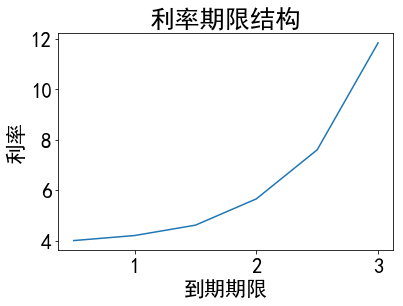

In [45]:
plt.plot(x,data['即期收益率'])
plt.title('利率期限结构')
plt.xlabel('到期期限')
plt.ylabel('利率')